In [6]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from sklearn import metrics

from tensorflow.keras.models import load_model


from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
import math

In [7]:
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [1]:
# data_dir = 'data' 

train_dir = './augmentedData/Train'
test_dir = './batchdata/Batch'


In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [5]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image ./batchdata/Batch/Scab_Apple/Scab_Apple3.jpg
Issue with image ./batchdata/Batch/Scab_Apple/Scab_Apple2.jpg
Issue with image ./batchdata/Batch/Scab_Apple/Scab_Apple1.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple41.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple55.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple54.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple40.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple56.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple42.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple43.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple57.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple53.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple47.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple46.jpg
Issue with image ./batchdata/Batch/Normal_Apple/Normal_Apple52.jpg
Issue with

# 3. Load Data

Total_train_data aangemaakt om balans tussen klassen in de set weer te geven

In [10]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=4000)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(224, 224),)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(224, 224), shuffle=True, batch_size=120)

Found 4000 files belonging to 4 classes.


2022-11-20 19:51:32.682453: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 4000 files belonging to 4 classes.
Found 79 files belonging to 4 classes.


In [11]:
for element in total_train_data.as_numpy_iterator(): 
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

2022-11-20 19:51:35.704362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.743034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.773281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.794047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.815533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.870872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.901768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.903199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:35.929148: W tensorflow/core/lib/png/png_io.cc:88] PNG 

{0: 1000, 1: 1000, 2: 1000, 3: 1000}

In [12]:
for element in test_data.as_numpy_iterator():         
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

2022-11-20 19:51:40.616869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:40.634398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


{0: 4, 1: 72, 3: 3}

In [13]:
train_iterator = train_data.as_numpy_iterator()
test_iterator = test_data.as_numpy_iterator()

In [14]:
train_batch = train_iterator.next()
test_batch = test_iterator.next()

2022-11-20 19:51:49.228671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:49.244237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:49.253952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:49.270752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:51:49.286461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


# Visualise train test en val data

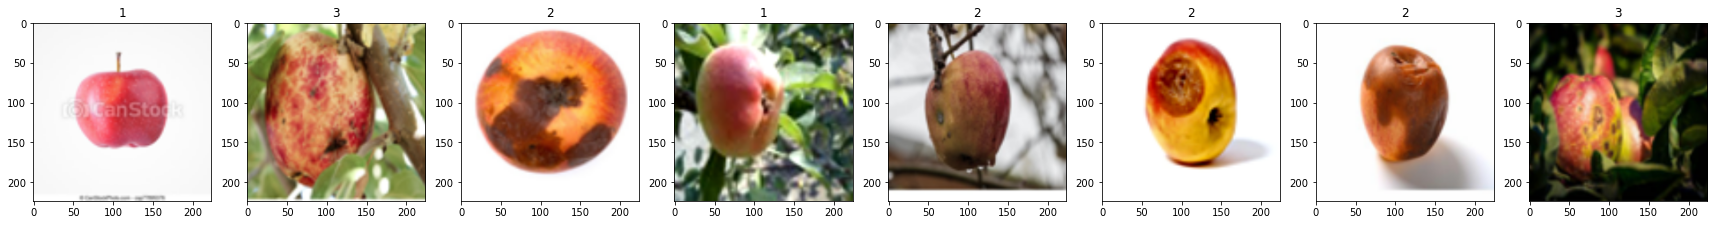

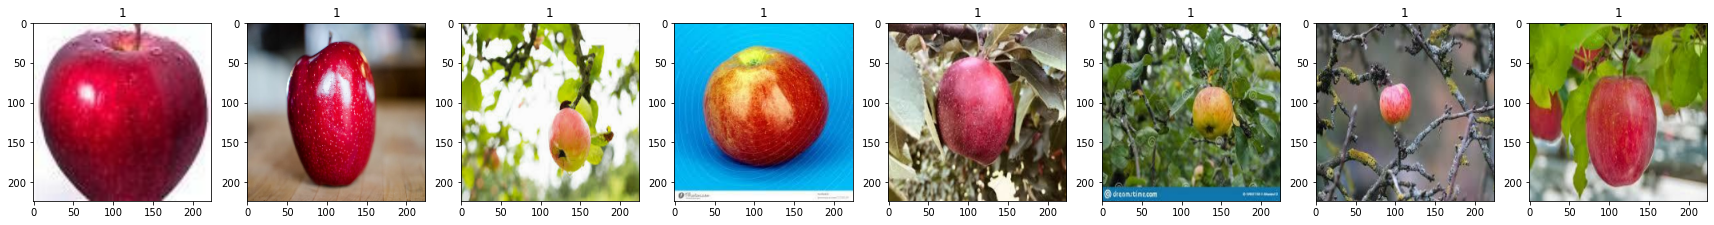

In [15]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(test_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])


# Scale data

In [16]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

In [17]:
train_data.as_numpy_iterator().next()
test_data.as_numpy_iterator().next()

2022-11-20 19:52:01.442921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:52:01.452157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:52:01.458948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:52:01.536107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:52:01.559780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# split data

In [18]:
imageCountTrain = len(train_data)
print (imageCountTrain) # is 125 batches van 32 dus alle 4000
imageCountTest = len(test_data) # is 1 batch van 120
print (imageCountTest)

125
1


In [19]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [20]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# Get and test Mobilenet v2 model

In [18]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


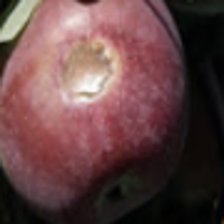

In [19]:
apple = Image.open("./augmentedData/Train/Normal_Apple/Normal_Apple_original_Normal_Apple1.jpg_51055edc-2072-4a14-bc82-9e0f8e0321ba.png").resize(IMAGE_SHAPE)
apple


In [20]:
apple = np.array(apple)/255.0
apple.shape


(224, 224, 3)

In [21]:
apple[np.newaxis, ...]

array([[[[0.06666667, 0.07058824, 0.06666667],
         [0.05882353, 0.0627451 , 0.05882353],
         [0.03921569, 0.04705882, 0.04705882],
         ...,
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608]],

        [[0.06666667, 0.07058824, 0.06666667],
         [0.05882353, 0.0627451 , 0.05882353],
         [0.03921569, 0.04705882, 0.04705882],
         ...,
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608]],

        [[0.06666667, 0.06666667, 0.0627451 ],
         [0.05882353, 0.05882353, 0.05490196],
         [0.03921569, 0.04313725, 0.04313725],
         ...,
         [0.09803922, 0.12156863, 0.09411765],
         [0.09803922, 0.12156863, 0.09411765],
         [0.09803922, 0.12156863, 0.09411765]],

        ...,

        [[0.02352941, 0.03137255, 0.01568627],
         [0.02352941, 0.03137255, 0.01176471]

In [22]:
result = classifier.predict(apple[np.newaxis, ...])
result.shape

(1, 1001)

In [23]:
predicted_label_index = np.argmax(result)
predicted_label_index

958

In [24]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("./ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [25]:
image_labels[predicted_label_index]

'pomegranate'

# retrain using the apples

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [27]:
num_of_apples = 4 # to set final layer

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_apples)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


2022-11-20 19:33:10.913677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:10.922004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:10.926144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:10.972508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:10.991083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  1/100 [..............................] - ETA: 6:14 - loss: 1.7430 - acc: 0.3125

2022-11-20 19:33:11.673383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 30s - loss: 1.5262 - acc: 0.3281 

2022-11-20 19:33:11.985764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/100 [>.............................] - ETA: 30s - loss: 1.3738 - acc: 0.3490

2022-11-20 19:33:13.290511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:13.291926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 30s - loss: 1.3214 - acc: 0.3929

2022-11-20 19:33:13.613442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/100 [====>.........................] - ETA: 27s - loss: 1.0644 - acc: 0.5441

2022-11-20 19:33:16.994589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 27s - loss: 1.0470 - acc: 0.5608

2022-11-20 19:33:17.305876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 26s - loss: 1.0345 - acc: 0.5707

2022-11-20 19:33:17.664742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/100 [========>.....................] - ETA: 21s - loss: 0.8639 - acc: 0.6543

2022-11-20 19:33:21.580946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 21s - loss: 0.8544 - acc: 0.6608

2022-11-20 19:33:22.194348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/100 [=========>....................] - ETA: 20s - loss: 0.8401 - acc: 0.6649

2022-11-20 19:33:22.805234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 19s - loss: 0.8130 - acc: 0.6795

2022-11-20 19:33:23.721107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 18s - loss: 0.7888 - acc: 0.6897

2022-11-20 19:33:24.635947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 17s - loss: 0.7838 - acc: 0.6911

2022-11-20 19:33:24.930191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 17s - loss: 0.7668 - acc: 0.7007

2022-11-20 19:33:25.544446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/100 [==============>...............] - ETA: 14s - loss: 0.7178 - acc: 0.7211

2022-11-20 19:33:27.921680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 14s - loss: 0.7040 - acc: 0.7278

2022-11-20 19:33:28.524077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/100 [================>.............] - ETA: 12s - loss: 0.6813 - acc: 0.7362

2022-11-20 19:33:29.713863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:29.715638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 12s - loss: 0.6744 - acc: 0.7372

2022-11-20 19:33:30.322249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:30.324539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 10s - loss: 0.6544 - acc: 0.7457

2022-11-20 19:33:31.840140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 9s - loss: 0.6466 - acc: 0.7500 

2022-11-20 19:33:32.555386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/100 [====================>.........] - ETA: 8s - loss: 0.6270 - acc: 0.7578

2022-11-20 19:33:33.770881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 7s - loss: 0.6142 - acc: 0.7633

2022-11-20 19:33:34.751339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/100 [=======================>......] - ETA: 5s - loss: 0.5893 - acc: 0.7726

2022-11-20 19:33:36.965350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:36.968394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/100 [=========================>....] - ETA: 3s - loss: 0.5727 - acc: 0.7795

2022-11-20 19:33:38.337355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.5413 - acc: 0.7944

2022-11-20 19:33:42.133749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.141755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.146341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.166322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.176353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.216264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.221767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.242053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:42.243112: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 42s 384ms/step - loss: 0.5413 - acc: 0.7944 - val_loss: 0.2691 - val_acc: 0.9200
Epoch 2/10


2022-11-20 19:33:49.816857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:49.824707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:49.828609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:49.869004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:49.888709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 28s - loss: 0.2224 - acc: 0.9375

2022-11-20 19:33:50.458224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 28s - loss: 0.2499 - acc: 0.9167

2022-11-20 19:33:50.749832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 27s - loss: 0.2447 - acc: 0.9152

2022-11-20 19:33:51.903799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:33:51.909402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 26s - loss: 0.2396 - acc: 0.9219

2022-11-20 19:33:52.197913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 23s - loss: 0.2349 - acc: 0.9340

2022-11-20 19:33:55.106629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 23s - loss: 0.2333 - acc: 0.9342

2022-11-20 19:33:55.409607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 23s - loss: 0.2315 - acc: 0.9359

2022-11-20 19:33:55.717216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 19s - loss: 0.2198 - acc: 0.9441

2022-11-20 19:33:59.452575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 18s - loss: 0.2180 - acc: 0.9446

2022-11-20 19:34:00.028477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 18s - loss: 0.2155 - acc: 0.9459

2022-11-20 19:34:00.598744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 17s - loss: 0.2142 - acc: 0.9477

2022-11-20 19:34:01.455119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 16s - loss: 0.2174 - acc: 0.9455

2022-11-20 19:34:02.326116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 16s - loss: 0.2160 - acc: 0.9460

2022-11-20 19:34:02.602792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 15s - loss: 0.2165 - acc: 0.9450

2022-11-20 19:34:03.179881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 13s - loss: 0.2134 - acc: 0.9468

2022-11-20 19:34:05.477861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 12s - loss: 0.2138 - acc: 0.9470

2022-11-20 19:34:06.034840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 11s - loss: 0.2122 - acc: 0.9464

2022-11-20 19:34:07.191035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:07.192341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 10s - loss: 0.2131 - acc: 0.9456

2022-11-20 19:34:07.766868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:07.778513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 9s - loss: 0.2097 - acc: 0.9478

2022-11-20 19:34:09.199683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 8s - loss: 0.2081 - acc: 0.9479

2022-11-20 19:34:09.795943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 7s - loss: 0.2067 - acc: 0.9482

2022-11-20 19:34:10.942662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 6s - loss: 0.2075 - acc: 0.9486

2022-11-20 19:34:11.798359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 4s - loss: 0.2033 - acc: 0.9501

2022-11-20 19:34:14.378672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:14.379071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 3s - loss: 0.2009 - acc: 0.9508

2022-11-20 19:34:15.864540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1974 - acc: 0.9516

2022-11-20 19:34:19.706484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.715249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.719246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.743239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.753785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.798283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.803922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.826485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:19.826518: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 39s 394ms/step - loss: 0.1974 - acc: 0.9516 - val_loss: 0.1693 - val_acc: 0.9575
Epoch 3/10


2022-11-20 19:34:29.337536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:29.348359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:29.354702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:29.412328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:29.432862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 34s - loss: 0.1236 - acc: 0.9531

2022-11-20 19:34:30.137984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 36s - loss: 0.1678 - acc: 0.9271

2022-11-20 19:34:30.548238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 36s - loss: 0.1531 - acc: 0.9509

2022-11-20 19:34:32.132657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:32.134812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 36s - loss: 0.1502 - acc: 0.9531

2022-11-20 19:34:32.552204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 29s - loss: 0.1379 - acc: 0.9618

2022-11-20 19:34:35.944516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 29s - loss: 0.1360 - acc: 0.9638

2022-11-20 19:34:36.332635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 28s - loss: 0.1370 - acc: 0.9625

2022-11-20 19:34:36.673237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 24s - loss: 0.1324 - acc: 0.9688

2022-11-20 19:34:41.413005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 23s - loss: 0.1328 - acc: 0.9696

2022-11-20 19:34:42.057183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 22s - loss: 0.1327 - acc: 0.9713

2022-11-20 19:34:42.818400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 21s - loss: 0.1335 - acc: 0.9711

2022-11-20 19:34:43.822446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 20s - loss: 0.1351 - acc: 0.9702

2022-11-20 19:34:44.951294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 20s - loss: 0.1351 - acc: 0.9702

2022-11-20 19:34:45.265648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 19s - loss: 0.1345 - acc: 0.9708

2022-11-20 19:34:46.016343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 16s - loss: 0.1328 - acc: 0.9716

2022-11-20 19:34:48.608584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 15s - loss: 0.1310 - acc: 0.9727

2022-11-20 19:34:49.243857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 14s - loss: 0.1319 - acc: 0.9724

2022-11-20 19:34:50.722064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:50.722167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 13s - loss: 0.1315 - acc: 0.9723

2022-11-20 19:34:51.518165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:51.522020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 11s - loss: 0.1314 - acc: 0.9725

2022-11-20 19:34:53.210710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 11s - loss: 0.1306 - acc: 0.9728

2022-11-20 19:34:53.936092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 9s - loss: 0.1287 - acc: 0.9739

2022-11-20 19:34:55.204062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 8s - loss: 0.1281 - acc: 0.9741

2022-11-20 19:34:56.181375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 5s - loss: 0.1283 - acc: 0.9743

2022-11-20 19:34:58.711138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:34:58.711307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 3s - loss: 0.1274 - acc: 0.9740

2022-11-20 19:35:00.322406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.1233 - acc: 0.9747

2022-11-20 19:35:04.120841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.129493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.134304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.158058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.168067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.212845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.219668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.246879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:04.247726: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 44s 438ms/step - loss: 0.1233 - acc: 0.9747 - val_loss: 0.1149 - val_acc: 0.9737
Epoch 4/10


2022-11-20 19:35:13.321095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:13.334033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:13.340697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:13.387634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:13.408835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  1/100 [..............................] - ETA: 59s - loss: 0.0587 - acc: 1.0000

2022-11-20 19:35:13.913936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 32s - loss: 0.0678 - acc: 1.0000

2022-11-20 19:35:14.208495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/100 [>.............................] - ETA: 35s - loss: 0.0775 - acc: 0.9948

2022-11-20 19:35:15.758298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:15.761850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 34s - loss: 0.0857 - acc: 0.9911

2022-11-20 19:35:16.125834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/100 [====>.........................] - ETA: 31s - loss: 0.0891 - acc: 0.9835

2022-11-20 19:35:19.891343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 30s - loss: 0.0889 - acc: 0.9826

2022-11-20 19:35:20.208968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 29s - loss: 0.0930 - acc: 0.9803

2022-11-20 19:35:20.523817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/100 [========>.....................] - ETA: 24s - loss: 0.0925 - acc: 0.9834

2022-11-20 19:35:25.107589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 23s - loss: 0.0909 - acc: 0.9844

2022-11-20 19:35:25.762466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/100 [=========>....................] - ETA: 22s - loss: 0.0893 - acc: 0.9844

2022-11-20 19:35:26.419084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 22s - loss: 0.0907 - acc: 0.9832

2022-11-20 19:35:27.637412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 21s - loss: 0.0933 - acc: 0.9821

2022-11-20 19:35:28.784861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 20s - loss: 0.0927 - acc: 0.9826

2022-11-20 19:35:29.184469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 20s - loss: 0.0929 - acc: 0.9826

2022-11-20 19:35:29.928627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/100 [==============>...............] - ETA: 17s - loss: 0.0934 - acc: 0.9823

2022-11-20 19:35:32.909018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 16s - loss: 0.0925 - acc: 0.9830

2022-11-20 19:35:33.704126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/100 [================>.............] - ETA: 14s - loss: 0.0903 - acc: 0.9836

2022-11-20 19:35:35.083607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:35.085481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 14s - loss: 0.0900 - acc: 0.9841

2022-11-20 19:35:35.914253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:35.918975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 12s - loss: 0.0896 - acc: 0.9848

2022-11-20 19:35:37.617623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 11s - loss: 0.0893 - acc: 0.9853

2022-11-20 19:35:38.288270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/100 [====================>.........] - ETA: 10s - loss: 0.0883 - acc: 0.9861

2022-11-20 19:35:39.556662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 8s - loss: 0.0887 - acc: 0.9858

2022-11-20 19:35:40.445304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/100 [=======================>......] - ETA: 5s - loss: 0.0879 - acc: 0.9857

2022-11-20 19:35:42.796723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:42.796952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/100 [=========================>....] - ETA: 4s - loss: 0.0867 - acc: 0.9865

2022-11-20 19:35:44.288211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0868 - acc: 0.9856

2022-11-20 19:35:47.847370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.854956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.859524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.882956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.893184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.933312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.938006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.959207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:47.959280: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 44s 437ms/step - loss: 0.0868 - acc: 0.9856 - val_loss: 0.0874 - val_acc: 0.9812
Epoch 5/10


2022-11-20 19:35:57.233498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:57.242602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:57.246846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:57.295358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:35:57.308695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 34s - loss: 0.0491 - acc: 1.0000

2022-11-20 19:35:57.947536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 37s - loss: 0.0567 - acc: 1.0000

2022-11-20 19:35:58.372579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 37s - loss: 0.0609 - acc: 1.0000

2022-11-20 19:36:00.035802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:00.037836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 37s - loss: 0.0607 - acc: 1.0000

2022-11-20 19:36:00.471283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 31s - loss: 0.0709 - acc: 0.9913

2022-11-20 19:36:04.092110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 30s - loss: 0.0691 - acc: 0.9918

2022-11-20 19:36:04.474929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 30s - loss: 0.0694 - acc: 0.9922

2022-11-20 19:36:04.844871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 24s - loss: 0.0670 - acc: 0.9915

2022-11-20 19:36:09.334300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 23s - loss: 0.0668 - acc: 0.9920

2022-11-20 19:36:10.026480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 22s - loss: 0.0676 - acc: 0.9924

2022-11-20 19:36:10.702316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 21s - loss: 0.0688 - acc: 0.9914

2022-11-20 19:36:11.733924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 20s - loss: 0.0690 - acc: 0.9920

2022-11-20 19:36:12.774246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 20s - loss: 0.0685 - acc: 0.9922

2022-11-20 19:36:13.098002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 19s - loss: 0.0691 - acc: 0.9925

2022-11-20 19:36:13.797453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 16s - loss: 0.0674 - acc: 0.9931

2022-11-20 19:36:16.794660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 15s - loss: 0.0670 - acc: 0.9933

2022-11-20 19:36:17.561373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 14s - loss: 0.0663 - acc: 0.9937

2022-11-20 19:36:19.140623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:19.144317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 13s - loss: 0.0664 - acc: 0.9934

2022-11-20 19:36:19.987952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:20.005252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 12s - loss: 0.0662 - acc: 0.9939

2022-11-20 19:36:22.022804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 11s - loss: 0.0654 - acc: 0.9941

2022-11-20 19:36:22.839227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 10s - loss: 0.0651 - acc: 0.9940

2022-11-20 19:36:24.619072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 9s - loss: 0.0656 - acc: 0.9938

2022-11-20 19:36:25.758363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 6s - loss: 0.0658 - acc: 0.9929

2022-11-20 19:36:28.910853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:28.913351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 4s - loss: 0.0652 - acc: 0.9933

2022-11-20 19:36:31.049267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0650 - acc: 0.9934

2022-11-20 19:36:35.500536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.512111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.517785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.549576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.560020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.611402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.619541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.645820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:35.647154: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 49s 492ms/step - loss: 0.0650 - acc: 0.9934 - val_loss: 0.0680 - val_acc: 0.9925
Epoch 6/10


2022-11-20 19:36:46.451833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:46.465065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:46.470665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:46.532248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:46.551160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 37s - loss: 0.0771 - acc: 0.9844

2022-11-20 19:36:47.347549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 37s - loss: 0.0590 - acc: 0.9896

2022-11-20 19:36:47.747125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 33s - loss: 0.0478 - acc: 0.9955

2022-11-20 19:36:49.132005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:36:49.145570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 33s - loss: 0.0541 - acc: 0.9922

2022-11-20 19:36:49.491753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 28s - loss: 0.0505 - acc: 0.9965

2022-11-20 19:36:52.966231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 28s - loss: 0.0535 - acc: 0.9934

2022-11-20 19:36:53.353868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 28s - loss: 0.0527 - acc: 0.9937

2022-11-20 19:36:53.754876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 24s - loss: 0.0519 - acc: 0.9943

2022-11-20 19:36:58.534318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 23s - loss: 0.0511 - acc: 0.9946

2022-11-20 19:36:59.280947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 22s - loss: 0.0518 - acc: 0.9941

2022-11-20 19:36:59.956021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 21s - loss: 0.0516 - acc: 0.9945

2022-11-20 19:37:00.972875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 20s - loss: 0.0528 - acc: 0.9942

2022-11-20 19:37:02.003126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 20s - loss: 0.0539 - acc: 0.9929

2022-11-20 19:37:02.326742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 19s - loss: 0.0553 - acc: 0.9932

2022-11-20 19:37:03.021400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 16s - loss: 0.0551 - acc: 0.9942

2022-11-20 19:37:05.655589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 15s - loss: 0.0551 - acc: 0.9944

2022-11-20 19:37:06.319966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 14s - loss: 0.0542 - acc: 0.9948

2022-11-20 19:37:07.624821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:07.625827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 13s - loss: 0.0537 - acc: 0.9950

2022-11-20 19:37:08.292236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:08.304316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 11s - loss: 0.0527 - acc: 0.9949

2022-11-20 19:37:09.923816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 10s - loss: 0.0519 - acc: 0.9950

2022-11-20 19:37:10.593347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 9s - loss: 0.0521 - acc: 0.9953

2022-11-20 19:37:11.892583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 8s - loss: 0.0522 - acc: 0.9951

2022-11-20 19:37:12.871150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 5s - loss: 0.0518 - acc: 0.9952

2022-11-20 19:37:15.436616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:15.437680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 3s - loss: 0.0512 - acc: 0.9954

2022-11-20 19:37:17.063704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0517 - acc: 0.9956

2022-11-20 19:37:20.680132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.687889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.692275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.717740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.727122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.769064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.774522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.797605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:20.799117: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 43s 425ms/step - loss: 0.0517 - acc: 0.9956 - val_loss: 0.0533 - val_acc: 0.9937
Epoch 7/10


2022-11-20 19:37:29.164271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:29.176090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:29.181780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:29.220802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:29.242234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 31s - loss: 0.0260 - acc: 1.0000

2022-11-20 19:37:29.755158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:29.903759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/100 [>.............................] - ETA: 30s - loss: 0.0319 - acc: 1.0000

2022-11-20 19:37:31.197975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:31.199636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 30s - loss: 0.0360 - acc: 1.0000

2022-11-20 19:37:31.538567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/100 [====>.........................] - ETA: 26s - loss: 0.0429 - acc: 0.9963

2022-11-20 19:37:34.713368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 26s - loss: 0.0426 - acc: 0.9965

2022-11-20 19:37:35.039939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 26s - loss: 0.0428 - acc: 0.9967

2022-11-20 19:37:35.382810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/100 [========>.....................] - ETA: 21s - loss: 0.0427 - acc: 0.9941

2022-11-20 19:37:39.539796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 21s - loss: 0.0426 - acc: 0.9945

2022-11-20 19:37:40.198875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/100 [=========>....................] - ETA: 20s - loss: 0.0422 - acc: 0.9948

2022-11-20 19:37:40.862080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 19s - loss: 0.0417 - acc: 0.9952

2022-11-20 19:37:41.839565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 18s - loss: 0.0415 - acc: 0.9955

2022-11-20 19:37:42.818152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 18s - loss: 0.0418 - acc: 0.9956

2022-11-20 19:37:43.130278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 17s - loss: 0.0421 - acc: 0.9958

2022-11-20 19:37:43.801202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/100 [==============>...............] - ETA: 15s - loss: 0.0431 - acc: 0.9965

2022-11-20 19:37:46.383176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 14s - loss: 0.0426 - acc: 0.9966

2022-11-20 19:37:47.016116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/100 [================>.............] - ETA: 13s - loss: 0.0423 - acc: 0.9968

2022-11-20 19:37:48.300138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:48.310401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 12s - loss: 0.0421 - acc: 0.9969

2022-11-20 19:37:48.945845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:48.951144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 10s - loss: 0.0415 - acc: 0.9972

2022-11-20 19:37:50.543430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 10s - loss: 0.0419 - acc: 0.9972

2022-11-20 19:37:51.207853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/100 [====================>.........] - ETA: 9s - loss: 0.0415 - acc: 0.9974

2022-11-20 19:37:52.496461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 8s - loss: 0.0414 - acc: 0.9975

2022-11-20 19:37:53.461787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/100 [=======================>......] - ETA: 5s - loss: 0.0410 - acc: 0.9977

2022-11-20 19:37:55.997369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:37:55.998076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/100 [=========================>....] - ETA: 3s - loss: 0.0408 - acc: 0.9975

2022-11-20 19:37:57.609617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0405 - acc: 0.9978

2022-11-20 19:38:01.444621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.452703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.457772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.482007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.491872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.538539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.544008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.567514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:01.568160: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 41s 407ms/step - loss: 0.0405 - acc: 0.9978 - val_loss: 0.0448 - val_acc: 0.9962
Epoch 8/10


2022-11-20 19:38:10.044909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:10.056729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:10.063197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:10.104249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:10.113379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 32s - loss: 0.0242 - acc: 1.0000

2022-11-20 19:38:10.632792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:10.791585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/100 [>.............................] - ETA: 31s - loss: 0.0289 - acc: 0.9948

2022-11-20 19:38:12.115715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:12.117556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 30s - loss: 0.0280 - acc: 0.9955

2022-11-20 19:38:12.463854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/100 [====>.........................] - ETA: 27s - loss: 0.0338 - acc: 0.9963

2022-11-20 19:38:15.690884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 26s - loss: 0.0352 - acc: 0.9948

2022-11-20 19:38:16.017946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 26s - loss: 0.0365 - acc: 0.9934

2022-11-20 19:38:16.402967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/100 [========>.....................] - ETA: 24s - loss: 0.0359 - acc: 0.9951

2022-11-20 19:38:21.525682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/100 [=========>....................] - ETA: 23s - loss: 0.0356 - acc: 0.9954

2022-11-20 19:38:22.340085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/100 [=========>....................] - ETA: 23s - loss: 0.0353 - acc: 0.9957

2022-11-20 19:38:23.177244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/100 [==========>...................] - ETA: 22s - loss: 0.0348 - acc: 0.9960

2022-11-20 19:38:24.455524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/100 [===========>..................] - ETA: 21s - loss: 0.0353 - acc: 0.9963

2022-11-20 19:38:25.594227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 20s - loss: 0.0355 - acc: 0.9964

2022-11-20 19:38:25.937307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/100 [============>.................] - ETA: 20s - loss: 0.0353 - acc: 0.9965

2022-11-20 19:38:26.637059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/100 [==============>...............] - ETA: 17s - loss: 0.0354 - acc: 0.9971

2022-11-20 19:38:29.360385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/100 [===============>..............] - ETA: 16s - loss: 0.0349 - acc: 0.9972

2022-11-20 19:38:30.009270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/100 [================>.............] - ETA: 14s - loss: 0.0348 - acc: 0.9974

2022-11-20 19:38:31.354484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:31.356868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/100 [=================>............] - ETA: 14s - loss: 0.0345 - acc: 0.9974

2022-11-20 19:38:32.029228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:32.031197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/100 [==================>...........] - ETA: 12s - loss: 0.0347 - acc: 0.9976

2022-11-20 19:38:33.876408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/100 [===================>..........] - ETA: 11s - loss: 0.0343 - acc: 0.9977

2022-11-20 19:38:34.621268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/100 [====================>.........] - ETA: 10s - loss: 0.0339 - acc: 0.9978

2022-11-20 19:38:36.046662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/100 [=====================>........] - ETA: 8s - loss: 0.0339 - acc: 0.9979

2022-11-20 19:38:37.020962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 83/100 [=======================>......] - ETA: 6s - loss: 0.0339 - acc: 0.9981

2022-11-20 19:38:39.633199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:39.634438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/100 [=========================>....] - ETA: 4s - loss: 0.0336 - acc: 0.9982

2022-11-20 19:38:41.434159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0332 - acc: 0.9984

2022-11-20 19:38:45.474233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.482257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.486416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.510847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.521075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.564273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.569902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.591823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:45.592497: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 45s 447ms/step - loss: 0.0332 - acc: 0.9984 - val_loss: 0.0407 - val_acc: 0.9975
Epoch 9/10


2022-11-20 19:38:54.870338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:54.882850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:54.888976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:54.944690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:54.962236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 33s - loss: 0.0192 - acc: 1.0000

2022-11-20 19:38:55.626994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 32s - loss: 0.0175 - acc: 1.0000

2022-11-20 19:38:55.964018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 30s - loss: 0.0232 - acc: 1.0000

2022-11-20 19:38:57.270608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:38:57.281641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 30s - loss: 0.0243 - acc: 1.0000

2022-11-20 19:38:57.612022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 27s - loss: 0.0300 - acc: 0.9965

2022-11-20 19:39:01.057639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 27s - loss: 0.0316 - acc: 0.9967

2022-11-20 19:39:01.405913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 27s - loss: 0.0310 - acc: 0.9969

2022-11-20 19:39:01.824247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 23s - loss: 0.0294 - acc: 0.9972

2022-11-20 19:39:06.511198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 23s - loss: 0.0292 - acc: 0.9973

2022-11-20 19:39:07.324973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 22s - loss: 0.0287 - acc: 0.9975

2022-11-20 19:39:08.005704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 21s - loss: 0.0296 - acc: 0.9969

2022-11-20 19:39:09.017582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 20s - loss: 0.0302 - acc: 0.9971

2022-11-20 19:39:10.145858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 19s - loss: 0.0302 - acc: 0.9972

2022-11-20 19:39:10.486902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 19s - loss: 0.0300 - acc: 0.9973

2022-11-20 19:39:11.276795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 16s - loss: 0.0309 - acc: 0.9977

2022-11-20 19:39:14.174718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 15s - loss: 0.0305 - acc: 0.9978

2022-11-20 19:39:14.850441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 14s - loss: 0.0305 - acc: 0.9979

2022-11-20 19:39:16.170492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:16.173916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 13s - loss: 0.0304 - acc: 0.9980

2022-11-20 19:39:16.861072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:16.863166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 11s - loss: 0.0300 - acc: 0.9981

2022-11-20 19:39:18.508693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 10s - loss: 0.0301 - acc: 0.9982

2022-11-20 19:39:19.177086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 9s - loss: 0.0298 - acc: 0.9983

2022-11-20 19:39:20.470624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 8s - loss: 0.0294 - acc: 0.9984

2022-11-20 19:39:21.462271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 5s - loss: 0.0289 - acc: 0.9985

2022-11-20 19:39:24.095225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:24.096436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 3s - loss: 0.0288 - acc: 0.9986

2022-11-20 19:39:25.974133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0290 - acc: 0.9987

2022-11-20 19:39:29.890569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:29.902777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:29.909443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:29.945695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:29.959083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:30.008609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:30.016147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:30.043325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:30.044388: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 44s 441ms/step - loss: 0.0290 - acc: 0.9987 - val_loss: 0.0336 - val_acc: 0.9975
Epoch 10/10


2022-11-20 19:39:39.063600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:39.075926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:39.081637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:39.137085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:39.156375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/100 [..............................] - ETA: 34s - loss: 0.0244 - acc: 1.0000

2022-11-20 19:39:39.834612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/100 [..............................] - ETA: 33s - loss: 0.0198 - acc: 1.0000

2022-11-20 19:39:40.174434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/100 [=>............................] - ETA: 31s - loss: 0.0246 - acc: 0.9955

2022-11-20 19:39:41.519168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:39:41.521866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/100 [=>............................] - ETA: 31s - loss: 0.0240 - acc: 0.9961

2022-11-20 19:39:41.856096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/100 [====>.........................] - ETA: 27s - loss: 0.0241 - acc: 0.9983

2022-11-20 19:39:45.118757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 19/100 [====>.........................] - ETA: 26s - loss: 0.0240 - acc: 0.9984

2022-11-20 19:39:45.451029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/100 [=====>........................] - ETA: 26s - loss: 0.0243 - acc: 0.9984

2022-11-20 19:39:45.804826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/100 [========>.....................] - ETA: 21s - loss: 0.0260 - acc: 0.9972

2022-11-20 19:39:49.996739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/100 [=========>....................] - ETA: 21s - loss: 0.0259 - acc: 0.9973

2022-11-20 19:39:50.737218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/100 [==========>...................] - ETA: 21s - loss: 0.0257 - acc: 0.9975

2022-11-20 19:39:51.512119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/100 [===========>..................] - ETA: 20s - loss: 0.0255 - acc: 0.9977

2022-11-20 19:39:52.665185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/100 [===========>..................] - ETA: 19s - loss: 0.0256 - acc: 0.9978

2022-11-20 19:39:53.871906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/100 [============>.................] - ETA: 19s - loss: 0.0255 - acc: 0.9979

2022-11-20 19:39:54.255981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/100 [============>.................] - ETA: 18s - loss: 0.0257 - acc: 0.9980

2022-11-20 19:39:55.006266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/100 [===============>..............] - ETA: 16s - loss: 0.0255 - acc: 0.9983

2022-11-20 19:39:58.043566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/100 [===============>..............] - ETA: 15s - loss: 0.0253 - acc: 0.9983

2022-11-20 19:39:58.805489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/100 [=================>............] - ETA: 14s - loss: 0.0249 - acc: 0.9984

2022-11-20 19:40:00.362665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:00.363739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/100 [=================>............] - ETA: 13s - loss: 0.0246 - acc: 0.9985

2022-11-20 19:40:01.009290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:01.014181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/100 [===================>..........] - ETA: 11s - loss: 0.0246 - acc: 0.9986

2022-11-20 19:40:02.960374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/100 [===================>..........] - ETA: 11s - loss: 0.0246 - acc: 0.9986

2022-11-20 19:40:03.832771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/100 [====================>.........] - ETA: 9s - loss: 0.0245 - acc: 0.9987 

2022-11-20 19:40:05.495436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/100 [=====================>........] - ETA: 8s - loss: 0.0244 - acc: 0.9988

2022-11-20 19:40:06.526586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/100 [========================>.....] - ETA: 5s - loss: 0.0246 - acc: 0.9989

2022-11-20 19:40:09.472380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:09.472866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/100 [=========================>....] - ETA: 3s - loss: 0.0245 - acc: 0.9989

2022-11-20 19:40:11.227970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/100 [==============================] - ETA: 0s - loss: 0.0244 - acc: 0.9991

2022-11-20 19:40:15.052977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.060622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.064495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.087999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.097982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.144814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.151322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.174230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:40:15.175281: W tensorflow/core/lib/png/png_io.cc:88] PNG 

100/100 [==============================] - 44s 444ms/step - loss: 0.0244 - acc: 0.9991 - val_loss: 0.0300 - val_acc: 0.9975


In [32]:
testscore = model.evaluate(test_data)
testscore

1/1 [==============================] - 2s 2s/step - loss: 0.8903 - acc: 0.7583


[0.8902998566627502, 0.7583333253860474]

# plot performance

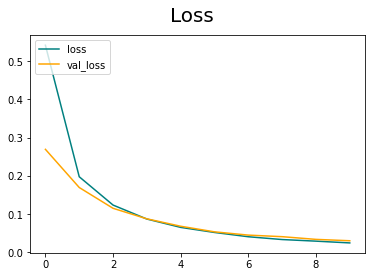

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
saved_model = tf.keras.models.load_model(
       ('./models/appleclassifier73transfer.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer})

In [22]:
for element in test_data.as_numpy_iterator(): 
    X, y = element
    yhat = saved_model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)
    unique2, counts2 = np.unique(y, return_counts=True)
    dict(zip(unique2, counts2))
    # print (yhat)
    # print (y)

print (pred)

unique2, counts2 = np.unique(pred, return_counts=True)
dict(zip(unique2, counts2))

noInBatch= (len(pred))


2022-11-20 19:56:14.919322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:56:14.936200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 2 2 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1]


In [23]:
stats = dict(zip(unique2, counts2))
print (stats)

nbrBlotch = stats[0]
nbrNormal = stats[1]
nbrRot = stats[2]
nbrScab = stats[3]
nbrRej = int(nbrBlotch)+int(nbrRot)+int(nbrScab)

percBlotch = int(nbrBlotch)/int(noInBatch)*100
percNormal = int(nbrNormal)/int(noInBatch)*100
percRot = int(nbrRot)/int(noInBatch)*100
percScab = int(nbrScab)/int(noInBatch)*100
percRej = int(nbrRej)/int(noInBatch)*100

if noInBatch != 120:
    
    print ("Please offer a batch of 80 apples for a correct quality control")

else:
    if nbrNormal >= 119: #79:                                          
        batchStatus = (f'The batch has been qualified as: Class 1\n , this is suitable for supermarkets and greengrocers.')
    elif nbrNormal >= 112: #75:
        batchStatus = (f'The batch has been qualified as: Class 2\n , this is suitable to be used in apple sauce.')
    elif nbrNormal >= 109: #73:
         (f'The batch has been qualified as: Class 3\n, this is suitable to be used in apple syrup.')
    else:
        batchStatus = (f'The batch has been rejected\n, this is too bad for you.')
    
print (batchStatus)

print (noInBatch)
print (percRej)

{0: 4, 1: 69, 2: 4, 3: 2}
Please offer a batch of 80 apples for a correct quality control


NameError: name 'batchStatus' is not defined

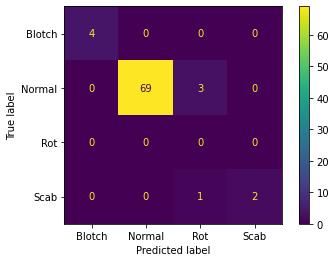

In [24]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [26]:
testscore = saved_model.evaluate(test_data)

2022-11-20 19:57:24.585878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 19:57:24.595304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 2s 2s/step - loss: 0.2648 - acc: 0.9494


# save and test load model

In [115]:
model.save(os.path.join('models','appleclassifier73transfer.h5'))

my_reloaded_model = tf.keras.models.load_model(
       (path),
custom_objects={'KerasLayer':hub.KerasLayer}

In [132]:
my_reloaded_model = tf.keras.models.load_model(
       ('./models/appleclassifier73transfer.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer})

In [133]:
my_reloaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [138]:
resize = tf.image.resize(img, (224,224))

In [139]:
yhat_new = my_reloaded_model.predict(np.expand_dims(resize/255, 0))

In [140]:
pred_new = np.argmax(yhat_new, axis=-1)

In [141]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with rot
